<a href="https://colab.research.google.com/github/ChoiSenn/E.B.S/blob/main/data_analysis/exercise/ch09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **데이터 분석과 머신러닝**
## 2022-05-29  분류와 군집화

<br><br>

---

<br><br>

## 1. 분류와 군집화

<br><br>

분류 : 소속 집단의 정보를 이미 알고 있는 상태에서, 새로운 데이터를 비슷한 집단으로 묶는 지도 학습의 한 종류
<br>

군집화 : 소속 집단의 정보가 없는 상태에서 비슷한 집단으로 묶는 비지도 학습의 한 종류

<br>

분류란 서로 다른 레이블로 표시된 소속 집단이 있을 경우 이들의 특성을 이용하여 새로운 데이터 A가 입력될 경우 가장 유사한 특성을 가진 집단으로 A의 집단을 결정하는 것이다.<br>
반면 군집화란 새로운 데이터의 분류에 집중하기 보다는 기존의 데이터를 가까운 특성 그룹으로 나누어서 특성 그룹의 성격을 파악하는 데 유용하다.

<br>

k-NN 알고리즘에서 k-NN은 k-최근접 이웃의 약자로, 특징 공간에 분포하는 데이터에 k개의 가장 가까운 이웃을 살펴보고 다수결 방식으로 데이터의 레이블을 할당하는 분류 방식이다.

<br><br>

---

<br><br>

## 2. k-NN 알고리즘에 사용할 표본 집합 시각화

<br><br>

k-NN 알고리즘은 k 값에 따라 결과가 달라지는 특징이 있다.<br>

k-NN 방법은 특징 공간에 있는 모든 데이터에 대한 정보가 필요하다. 따라서 데이터 인스턴스, 클래스, 특징의 요소들의 개수가 많다면, 많은 메모리 공간과 계산 시간이 필요하다는 단점이 있다. 반면 알고리즘이 매우 단순하고 직관적이며, 사전 학습이나 특별한 준비 시간이 필요없다는 점은 장점이다.

<br>

k-NN 알고리즘으로 닥스훈트와 진돗개의 데이터를 분석하기 위해 맷플롯립으로 데이터를 시각화해보았다.

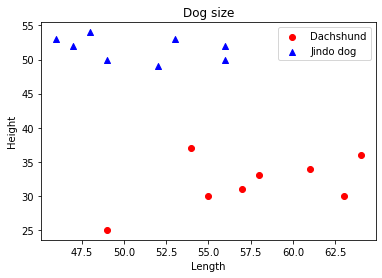

In [ ]:
import matplotlib.pyplot as plt

dach_length = [55, 57, 64, 63, 58, 49, 54, 61]
dach_height = [30, 31, 36, 30, 33, 25, 37, 34]
jin_length = [56, 47, 56, 46, 49, 53, 52, 48]
jin_height = [52, 52, 50, 53, 50, 53, 49, 54]

plt.scatter(dach_length, dach_height, c='r', label='Dachshund')
plt.scatter(jin_length, jin_height,c='b',marker='^', label='Jindo dog')

plt.xlabel('Length')             
plt.ylabel('Height')             
plt.title("Dog size")
plt.legend(loc='upper right')

<br><br>

---

<br><br>

## 3. k-NN 분류기를 실행

<br><br>

어느 쪽으로 분류할지 결정해야 할 새로운 데이터를 추가하여 시각화한다.

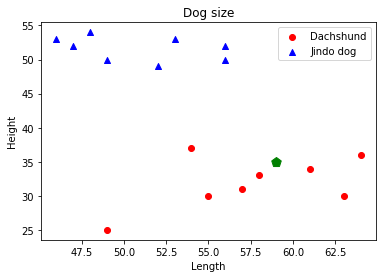

In [ ]:
import matplotlib.pyplot as plt

dach_length = [55, 57, 64, 63, 58, 49, 54, 61]
dach_height = [30, 31, 36, 30, 33, 25, 37, 34]
jin_length = [56, 47, 56, 46, 49, 53, 52, 48]
jin_height = [52, 52, 50, 53, 50, 53, 49, 54]

plt.scatter(dach_length, dach_height, c='r', label='Dachshund')
plt.scatter(jin_length, jin_height,c='b',marker='^', label='Jindo dog')

plt.xlabel('Length')             
plt.ylabel('Height')             
plt.title("Dog size")
plt.legend(loc='upper right')

newdata_length = [59]
newdata_height = [35]

plt.scatter(newdata_length, newdata_height, s=100, marker='p', c='g', label='new Data')

새 데이터의 가까이에 있는 점들의 대부분은 닥스훈트 클래스로 보인다. 이제 k-NN 알고리즘을 적용하여 새로운 데이터를 닥스훈트 클래스로 잘 분류하는지 확인한다.

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics 

dach_length = [55, 57, 64, 63, 58, 49, 54, 61]
dach_height = [30, 31, 36, 30, 33, 25, 37, 34]
jin_length = [56, 47, 56, 46, 49, 53, 52, 48]
jin_height = [52, 52, 50, 53, 50, 53, 49, 54]

d_data = np.column_stack((dach_length, dach_height))
d_label = np.zeros(len(d_data))   # 닥스훈트는 0으로 레이블링
j_data = np.column_stack((jin_length, jin_height))
j_label = np.ones(len(j_data))   # 진돗개는 1로 레이블링

newdata = [[59, 35]]

dogs = np.concatenate((d_data, j_data))
labels = np.concatenate((d_label, j_label))

dog_classes = {0:'닥스훈트', 1:'진돗개'} 

k = 3     # k를 3으로 지정
knn = KNeighborsClassifier(n_neighbors = k) 
knn.fit(dogs, labels)
y_pred = knn.predict(newdata)
print('데이터', newdata, ', 판정 결과:', dog_classes[y_pred[0]])

데이터 [[59, 35]] , 판정 결과: 닥스훈트


입력된 데이터는 k-NN 분류기에 의해 닥스훈트로 분류된 모습을 알 수 있다.

<br><br>

---

<br><br>

## 4. k-NN 활용 예제 - 붓꽃 데이터 준비

<br><br>

사이킷런 라이브러리에서는 꽃받침의 길이와 너비 및 꽃잎의 길이와 너비에 대한 정보, 그리고 종 이름을 가진 붓꽃 데이터셋을 제공한다.
<br>

꽃받침과 꽃잎의 크기 데이터를 기반으로 새로운 종을 분류하는 k-NN 모델을 구축한다.<br>

우선 데이터를 읽어들여 가져오고 다루기 쉽도록 판다스의 데이터프레임으로 만들어본다.

In [ ]:
from sklearn.datasets import load_iris 
import pandas as pd

iris = load_iris()

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = pd.Series(iris.target)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<br><br>

---

<br><br>

## 5. k-NN 활용 예제 - 붓꽃 데이터로 학습

<br><br>

붓꽃 데이터셋에 k-NN 알고리즘을 적용하기 위해 입력 값 X와 레이블 y로 나누어준다.

In [ ]:
X = iris_df.iloc[:, :4]
y = iris_df.iloc[:, -1]

이제 X, y를 train_test_split() 함수를 사용하여 훈련 데이터와 검증 데이터로 구분한 다음, k-NN 알고리즘을 적용하고 정확도를 측정한다.

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics 

def iris_knn(X, y, k):
    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)
    knn = KNeighborsClassifier(n_neighbors = k) 
    knn.fit(X_train, y_train) 
    y_pred = knn.predict(X_test) 
    return metrics.accuracy_score(y_test, y_pred) 

k = 3
scores = iris_knn(X, y, k)
print('n_neighbors가 {0:d}일때 정확도: {1:.3f}'.format(k, scores))

n_neighbors가 3일때 정확도: 0.933


검증 데이터의 전체를 30%로 두고, 나머지 70%를 이용하여 학습한 결과 k값이 3일 때 k-NN 알고리즘이 93.3%의 정확도로 예측하였음을 알 수 있다.

<br><br>

---

<br><br>

## 도전문제 : 위의 코드에서 k 값을 수정하여 n_neighbors가 1, 5, 10, 20, 30일 때의 정확도를 각각 출력하시오.



In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics 

def iris_knn(X, y, k):
    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)
    knn = KNeighborsClassifier(n_neighbors = k) 
    knn.fit(X_train, y_train) 
    y_pred = knn.predict(X_test) 
    return metrics.accuracy_score(y_test, y_pred) 

k = 1
scores = iris_knn(X, y, k)
print('n_neighbors가 {0:d}일때 정확도: {1:.3f}'.format(k, scores))
k = 5
scores = iris_knn(X, y, k)
print('n_neighbors가 {0:d}일때 정확도: {1:.3f}'.format(k, scores))
k = 10
scores = iris_knn(X, y, k)
print('n_neighbors가 {0:d}일때 정확도: {1:.3f}'.format(k, scores))
k = 20
scores = iris_knn(X, y, k)
print('n_neighbors가 {0:d}일때 정확도: {1:.3f}'.format(k, scores))
k = 30
scores = iris_knn(X, y, k)
print('n_neighbors가 {0:d}일때 정확도: {1:.3f}'.format(k, scores))

n_neighbors가 1일때 정확도: 0.956
n_neighbors가 5일때 정확도: 0.978
n_neighbors가 10일때 정확도: 0.933
n_neighbors가 20일때 정확도: 0.911
n_neighbors가 30일때 정확도: 0.889


<br><br>

---

<br><br>

## 6. 새로운 꽃에 대해 모델을 적용하고 분류

<br><br>

사용 가능한 모든 데이터를 사용해서 모델을 학습하고 새로운 데이터로 예측해본다.

In [ ]:
from sklearn.datasets import load_iris 
from sklearn.neighbors import KNeighborsClassifier 
 
k = 3
iris = load_iris() 
knn = KNeighborsClassifier(n_neighbors = k) 
knn.fit(iris.data, iris.target) 

classes = {0:'setosa', 1:'versicolor', 2:'virginica'} 

X = [[4, 2, 1.3, 0.4], 
     [4, 3, 3.2, 2.2]] 
y = knn.predict(X) 
 
print('{} 특성을 가지는 품종: {}'.format(X[0], classes[y[0]])) 
print('{} 특성을 가지는 품종: {}'.format(X[1], classes[y[1]]))

y_pred_all = knn.predict(iris.data)
scores = metrics.accuracy_score(iris.target, y_pred_all)
print('n_neighbors가 {0:d}일때 정확도: {1:.3f}'.format(k, scores))

[4, 2, 1.3, 0.4] 특성을 가지는 품종: setosa
[4, 3, 3.2, 2.2] 특성을 가지는 품종: versicolor
n_neighbors가 3일때 정확도: 0.960


4% 정도의 오차가 있었음을 알 수 있다. 아래 코드를 2차원 히스토그램으로 시각화하여 한눈에 알아보자.

(array([[50.,  0.,  0.],
        [ 0., 47.,  3.],
        [ 0.,  3., 47.]]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <matplotlib.collections.QuadMesh at 0x7f5323eb8450>)

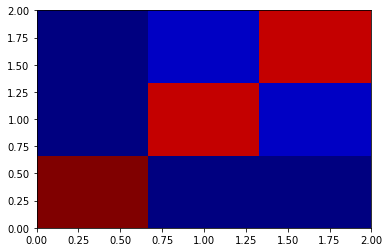

In [ ]:
import matplotlib.pyplot as plt
plt.hist2d(iris.target, y_pred_all, bins=(3,3), cmap=plt.cm.jet)

사이킷런 모듈에서는 이러한 시각화 결과를 혼동 행렬이라고 한다. 클래스 0의 데이터는 모두 0으로 잘 분류되었지만, 클래스 1의 데이터 3개가 2로 잘못 분류되었음을 알 수 있다.

<br><br>

---

<br><br>

## 7. 게임을 하는 고객을 분류 - k-평균 알고리즘의 단점

<br><br>

k-평균 알고리즘은 원리가 단순하고 직관적이며 성능이 좋은 군집화 알고리즘이다. 그러나 사전에 군집의 개수 k 값을 지정해야 하는 단점이 있다.

<br><br>

---

<br><br>

## 8. 데이터 전처리의 필요성

<br><br>

게임 사용자의 사용 시간과 레벨 정보를 가져와서 확인하고 산포도 그래프를 그려본다.

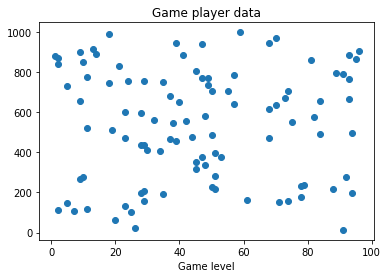

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_loc = 'https://github.com/dongupak/DataML/raw/main/csv/'
game_usage = pd.read_csv(data_loc + 'game_usage.csv')

X = game_usage['time spent']
Y = game_usage['game level']

plt.title("Game player data")
plt.xlabel('Time spent')
plt.xlabel('Game level') 
plt.scatter(X, Y)

이 데이터를 k-평균 군집화 기법을 이용하여 4개의 군집으로 분류한다. 쌍의 데이터를 받아 군집으로 나누어 시각화해주는 kmeans_predict_plot() 함수를 만들어 이용한다.

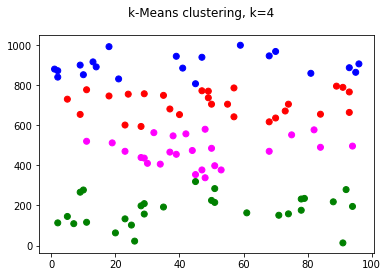

In [2]:
from sklearn import cluster

def kmeans_predict_plot(data, k):
   model = cluster.KMeans(n_clusters=k)
   model.fit(data)
   labels = model.predict(data)
   colors = np.array(['red', 'green', 'blue', 'magenta'])
   plt.suptitle('k-Means clustering, k={}'.format(k))
   plt.scatter(data[:, 0], data[:, 1], color=colors[labels])

gamer_data = np.column_stack((X, Y))
kmeans_predict_plot(gamer_data, k = 4)

<br><br>

---

<br><br>

## 9. 데이터 정규화 방법 이용

<br><br>

k-평균 알고리즘은 거리값을 기준으로 가까운 값을 같은 군집으로 분류하기 때문에 적절한 군집화가 이루어지지 않을 수도 있다. 따라서 각각의 특징들이 갖는 값들을 동일한 규모로 변경하는 작업이 필요할 수도 있다.
<br>

이때 각 데이터를 정규화 하는 방법이 있다. 정규화는 모든 데이터를 0에서 1 사이의 값이 되도록 하는 것이다. 

<br>

fit() 메소드는 데이터의 최대, 최소값을 바탕으로 데이터를 정규화한다. 정규화된 데이터의 min(), max()는 각각 0과 1이 된다.

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(gamer_data)
n_data = scaler.transform(gamer_data)

print(n_data[:, 0].mean(), n_data[:, 1].mean())
print(n_data[:, 0].min(), n_data[:, 0].max())
print(n_data[:, 1].min(), n_data[:, 1].max())

0.4731578947368421 0.5324949290060852
0.0 1.0
0.0 1.0


이제 정규화된 데이터에 대하여 4개의 군집으로 나누는 작업을 한다.

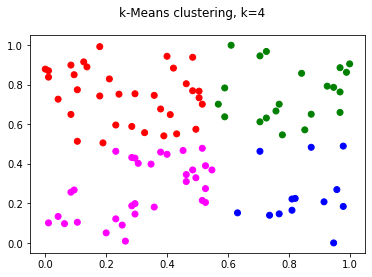

In [5]:
kmeans_predict_plot(n_data, k = 4)

정규화를 해야만 위의 그래프처럼 x축과 y축의 특성이 모두 반영된 군집화 결과를 얻을 수 있다.

<br><br>

---

<br><br>

## 10. 다양한 스케일러 살펴보기

<br><br>

데이터를 정제하는 또 다른 방법은 표준화이다. 표준화는 데이터를 정제할 때 전체의 평균과 분산을 사용한다.<br>

표준편차는 분산의 제곱근이다. 표준화는 이들의 값을 구한 뒤에 x를 계산하여 변환하는 것이다. 변환이 이루어지면 x'는 평균이 0이고 분산이 1인 데이터가 된다.

In [6]:
import numpy as np

a = np.array([10, 8, 10, 8, 8, 4])
print('합계 :', a.sum())
print('평균 :', a.mean())
print('분산 :', a.var())
print('표준편차 :', a.std())

합계 : 48
평균 : 8.0
분산 : 4.0
표준편차 : 2.0


사이킷런을 이용하여 데이터를 표준화할 때는 preprocessing의 StandardScalar 클래스를 사용한다. 표준화의 결과 데이터의 평균은 0이 되며 분산은 1이 된다.

<br>

게임 데이터를 표준 스케일러인 StandartScalar로 변환한 후 분산을 확인하면 1이 되며 평균값은 0에 가까운 값이 되는 것을 알 수 있다.

In [7]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(gamer_data)
gamer_data_scaled = standardScaler.transform(gamer_data)

gamer_data_scaled[:, 0].std(), gamer_data_scaled[:, 1].std()

(1.0000000000000002, 1.0)

In [8]:
gamer_data_scaled[:, 0].mean(), gamer_data_scaled[:, 1].mean()

(-1.1435297153639113e-16, 1.1546319456101628e-16)

<br><br>

---

<br><br>

# 심화문제

<br><br>

## 1. 진돗개와 닥스훈트 분류 문제

### 1-1. 두 데이터 군집의 중간에 있는 길이 52, 높이 42인 데이터를 녹색 점으로 표시하여라.

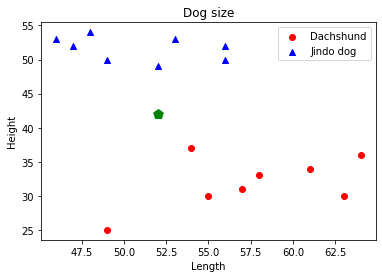

In [9]:
import matplotlib.pyplot as plt

dach_length = [55, 57, 64, 63, 58, 49, 54, 61]
dach_height = [30, 31, 36, 30, 33, 25, 37, 34]
jin_length = [56, 47, 56, 46, 49, 53, 52, 48]
jin_height = [52, 52, 50, 53, 50, 53, 49, 54]

plt.scatter(dach_length, dach_height, c='r', label='Dachshund')
plt.scatter(jin_length, jin_height,c='b',marker='^', label='Jindo dog')

plt.xlabel('Length')             
plt.ylabel('Height')             
plt.title("Dog size")
plt.legend(loc='upper right')

newdata_length = [52]
newdata_height = [42]

plt.scatter(newdata_length, newdata_height, s=100, marker='p', c='g', label='new Data')

### 1-2. 위의 데이터에 k-NN 알고리즘을 적용하여라. 이때 k값을 1, 5, 9로 두어서 분류를 확인한다.

In [10]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics 

dach_length = [55, 57, 64, 63, 58, 49, 54, 61]
dach_height = [30, 31, 36, 30, 33, 25, 37, 34]
jin_length = [56, 47, 56, 46, 49, 53, 52, 48]
jin_height = [52, 52, 50, 53, 50, 53, 49, 54]

d_data = np.column_stack((dach_length, dach_height))
d_label = np.zeros(len(d_data))   # 닥스훈트는 0으로 레이블링
j_data = np.column_stack((jin_length, jin_height))
j_label = np.ones(len(j_data))   # 진돗개는 1로 레이블링

newdata = [[52, 42]]

dogs = np.concatenate((d_data, j_data))
labels = np.concatenate((d_label, j_label))

dog_classes = {0:'닥스훈트', 1:'진돗개'} 

k = 1 
knn = KNeighborsClassifier(n_neighbors = k) 
knn.fit(dogs, labels)
y_pred = knn.predict(newdata)
print('k = 1일 때 판정 결과:', dog_classes[y_pred[0]])

k = 5
knn = KNeighborsClassifier(n_neighbors = k) 
knn.fit(dogs, labels)
y_pred = knn.predict(newdata)
print('k = 5일 때 판정 결과:', dog_classes[y_pred[0]])

k = 9
knn = KNeighborsClassifier(n_neighbors = k) 
knn.fit(dogs, labels)
y_pred = knn.predict(newdata)
print('k = 9일 때 판정 결과:', dog_classes[y_pred[0]])

k = 1일 때 판정 결과: 닥스훈트
k = 5일 때 판정 결과: 진돗개
k = 9일 때 판정 결과: 진돗개


## 2. 펭귄의 각 종에 대한 8개의 샘플이 있다.

### 2-1. k-NN 알고리즘을 이용해 분류하고자 한다. 이를 위해 펭귄의 키와 몸무게를 하나의 쌍으로 묶어 각각을 다차원 배열로 출력한다.

In [16]:
king_h = np.array([[90, 36.2], [98, 39.1], [85, 30.4], [83, 33.6], [73, 22.9], [97, 37.3], [93, 34.2], [80, 31.1]])
jen_h = np.array([[55, 9.6], [65, 10.7], [67, 8.9], [78, 16.3], [81, 18.0], [83, 17.3], [63, 5.9], [77, 16.1]])
rock_h = np.array([[44, 3.5], [48, 4.1], [58, 4.9], [41, 3.0], [46, 4.8], [57, 5.3], [41, 3.6], [45, 3.8]])

print("황제펭귄: ", king_h)
print("젠투펭귄: ", jen_h)
print("바위뛰기펭귄: ", rock_h)

황제펭귄:  [[90.  36.2]
 [98.  39.1]
 [85.  30.4]
 [83.  33.6]
 [73.  22.9]
 [97.  37.3]
 [93.  34.2]
 [80.  31.1]]
젠투펭귄:  [[55.   9.6]
 [65.  10.7]
 [67.   8.9]
 [78.  16.3]
 [81.  18. ]
 [83.  17.3]
 [63.   5.9]
 [77.  16.1]]
바위뛰기펭귄:  [[44.   3.5]
 [48.   4.1]
 [58.   4.9]
 [41.   3. ]
 [46.   4.8]
 [57.   5.3]
 [41.   3.6]
 [45.   3.8]]


### 2-2. 넘파이의 concatenate() 함수를 사용하여 이 세 종의 다차원 배열을 차례대로 연결하여 하나의 넘파이 배열인 penguins를 만들고 출력하라.

In [20]:
penguins  = np.concatenate((king_h, jen_h, rock_h))

print("penguins : ", penguins)

penguins :  [[90.  36.2]
 [98.  39.1]
 [85.  30.4]
 [83.  33.6]
 [73.  22.9]
 [97.  37.3]
 [93.  34.2]
 [80.  31.1]
 [55.   9.6]
 [65.  10.7]
 [67.   8.9]
 [78.  16.3]
 [81.  18. ]
 [83.  17.3]
 [63.   5.9]
 [77.  16.1]
 [44.   3.5]
 [48.   4.1]
 [58.   4.9]
 [41.   3. ]
 [46.   4.8]
 [57.   5.3]
 [41.   3.6]
 [45.   3.8]]


### 2-3. 레이블을 만든다.

In [24]:
labels  = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2]

print("labels : ", labels)

labels :  [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2]


### 2-4. 키와 몸무게만을 알고 있는 새로운 펭귄 데이터 A,B,C,D,E를 k-NN 알고리즘을 이용해 분류하자.

In [32]:
pen_classes = {0:'황제펭귄', 1:'젠투펭귄', 2:'바위뛰기펭귄'} 

A = [[75, 23.1]]
B = [[74, 16.6]]
C = [[56, 5.4]]
D = [[50, 5.3]]
E = [[89, 30.1]]

for i in range(1, 6):
  k = i
  knn = KNeighborsClassifier(n_neighbors = k) 
  knn.fit(penguins, labels)
  y_pred = knn.predict(A)
  print('A : n_neighbors가',k, '일 때 : ', pen_classes[y_pred[0]])

print()

for i in range(1, 6):
  k = i
  knn = KNeighborsClassifier(n_neighbors = k) 
  knn.fit(penguins, labels)
  y_pred = knn.predict(B)
  print('B : n_neighbors가',k, '일 때 : ', pen_classes[y_pred[0]])

print()

for i in range(1, 6):
  k = i
  knn = KNeighborsClassifier(n_neighbors = k) 
  knn.fit(penguins, labels)
  y_pred = knn.predict(C)
  print('C : n_neighbors가',k, '일 때 : ', pen_classes[y_pred[0]])

print()

for i in range(1, 6):
  k = i
  knn = KNeighborsClassifier(n_neighbors = k) 
  knn.fit(penguins, labels)
  y_pred = knn.predict(D)
  print('D : n_neighbors가',k, '일 때 : ', pen_classes[y_pred[0]])

print()

for i in range(1, 6):
  k = i
  knn = KNeighborsClassifier(n_neighbors = k) 
  knn.fit(penguins, labels)
  y_pred = knn.predict(E)
  print('E : n_neighbors가',k, '일 때 : ', pen_classes[y_pred[0]])

A : n_neighbors가 1 일 때 :  황제펭귄
A : n_neighbors가 2 일 때 :  황제펭귄
A : n_neighbors가 3 일 때 :  젠투펭귄
A : n_neighbors가 4 일 때 :  젠투펭귄
A : n_neighbors가 5 일 때 :  젠투펭귄

B : n_neighbors가 1 일 때 :  젠투펭귄
B : n_neighbors가 2 일 때 :  젠투펭귄
B : n_neighbors가 3 일 때 :  젠투펭귄
B : n_neighbors가 4 일 때 :  젠투펭귄
B : n_neighbors가 5 일 때 :  젠투펭귄

C : n_neighbors가 1 일 때 :  바위뛰기펭귄
C : n_neighbors가 2 일 때 :  바위뛰기펭귄
C : n_neighbors가 3 일 때 :  바위뛰기펭귄
C : n_neighbors가 4 일 때 :  젠투펭귄
C : n_neighbors가 5 일 때 :  바위뛰기펭귄

D : n_neighbors가 1 일 때 :  바위뛰기펭귄
D : n_neighbors가 2 일 때 :  바위뛰기펭귄
D : n_neighbors가 3 일 때 :  바위뛰기펭귄
D : n_neighbors가 4 일 때 :  바위뛰기펭귄
D : n_neighbors가 5 일 때 :  바위뛰기펭귄

E : n_neighbors가 1 일 때 :  황제펭귄
E : n_neighbors가 2 일 때 :  황제펭귄
E : n_neighbors가 3 일 때 :  황제펭귄
E : n_neighbors가 4 일 때 :  황제펭귄
E : n_neighbors가 5 일 때 :  황제펭귄


### 2-5. 이 데이터를 산포도 그래프로 그려서 나타내보자.

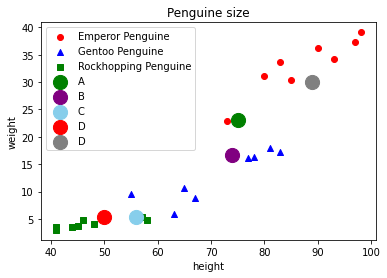

In [55]:
king_height, king_weight, gen_height, gen_weight, rock_height, rock_weight = [], [], [], [], [], []

for i in range(len(king_h)):
  king_height.append(king_h[i][0])
  king_weight.append(king_h[i][1])
  gen_height.append(jen_h[i][0])
  gen_weight.append(jen_h[i][1])
  rock_height.append(rock_h[i][0])
  rock_weight.append(rock_h[i][1])

ah = [75]
aw = [23.1]
bh = [74]
bw = [16.6]
ch = [56]
cw = [5.4]
dh = [50]
dw = [5.3]
eh = [89]
ew = [30.1]

plt.title("Penguine size")
plt.xlabel('height')
plt.ylabel('weight') 

plt.scatter(king_height, king_weight, c='r',marker='o', label='Emperor Penguine')
plt.scatter(gen_height, gen_weight ,c='b',marker='^', label='Gentoo Penguine')
plt.scatter(rock_height, rock_weight ,c='g',marker='s', label='Rockhopping Penguine')
plt.scatter(ah, aw ,c='g',marker='o', label='A', s = 200)
plt.scatter(bh, bw ,c='purple',marker='o', label='B', s = 200)
plt.scatter(ch, cw ,c='skyblue',marker='o', label='C', s = 200)
plt.scatter(dh, dw ,c='red',marker='o', label='D', s = 200)
plt.scatter(eh, ew ,c='grey',marker='o', label='D', s = 200)

plt.legend()
plt.show()